In [341]:
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import time

In [342]:
def setting_data(data=None):
    feature_matrix = np.ones((np.ma.size(data,axis=0),np.ma.size(data,axis=1)+1))
    feature_matrix[:,1:] = data
    return feature_matrix

In [343]:
def predict_values(feature_matrix=None, weights=None):
    return np.dot(a=feature_matrix,b=weights)

In [344]:
def polynomial_features_generation(data=None, degree=0):
    return np.hstack((data,np.power(data,np.arange(start=2,stop=degree+1))))

In [345]:
def standardization(data=None):
    data = data.astype(float)
    for i in range(data.shape[1]):
        data[:,i] = np.divide(np.subtract(data[:,i],np.mean(data[:,i])), np.std(data[:,i])).astype(float)
    return data

In [372]:
def min_max_scaling(data=None):
    data = data.astype(float)
    for i in range(data.shape[1]):
        min_ = np.min(data[:,i])
        max_ = np.max(data[:,i])
        max_minus_min = max_ - min_
        data[:,i] = np.divide(np.subtract(data[:,i],min_),max_minus_min)
    return data

In [347]:
def root_mean_squared_error(y=None,y_bar=None,no_of_observations=0):
    return np.sqrt(np.divide(np.sum(np.square(np.subtract(y,y_bar))),no_of_observations))

In [348]:
def gradient_descent(x=None,y=None,tolerance_gradient=0.01, tolerance_cost=0.0000001,
                     alpha = 0.001, max_iter=10000,l2_regularization=0):
   
    feature_matrix = setting_data(data=x)
    
    weights = np.random.rand(x.shape[1] + 1, 1)
    partials = np.zeros(x.shape[1]+1).reshape((-1,1))
    
    i = 0
    prev_cost = 10
    costs = []
    gradients = []
    
    converged = False
    while not converged:
        i += 1
        
        predicted = predict_values(feature_matrix=feature_matrix, weights=weights)
        errors = np.subtract(predicted, y)
        #Updating weights
        
        #taking derivative
        partials = np.dot(feature_matrix.T,errors)
        #This is the total change :p
#         step_size = np.multiply(alpha,partials)
#         weights_regularized = np.vstack((weights[0],np.multiply(weights[1:],1-2*alpha*l2_regularization)))
        
        weights = np.subtract(np.vstack((weights[0],np.multiply(weights[1:],1-2*alpha*l2_regularization))),
                              np.multiply(alpha,partials))
        
        gradient_magnitude = np.sqrt(np.sum(np.square(partials)))
        cur_cost = np.sum(np.square(errors))
        
#         gradients = np.append(gradients,gradient_magnitude)
#         costs = np.append(costs,cur_cost)
        gradients.append(gradient_magnitude)
        costs.append(cur_cost)

#         if i%1000==0:
#             print(cur_cost)
#         print(abs(cur_cost - prev_cost))
        if (gradient_magnitude <= tolerance_gradient) or (abs(cur_cost - prev_cost) < tolerance_cost):
            if gradient_magnitude <= tolerance_gradient:
                print('[Gradient Magnitude - Tolerance] Satisfied')
            else:
                print('[Cost Tolerance - Precision] Satisfied')
            converged = True

        if i >= max_iter:
            print('Iterations Completed')
            converged = True
        
        prev_cost = cur_cost
    return (i, np.array(weights),np.array(gradients), costs)

In [373]:
x = np.arange(-10, 11).reshape(-1,1)
y = (10 + 2*x + 5*x**2).astype(float).reshape(-1,1)

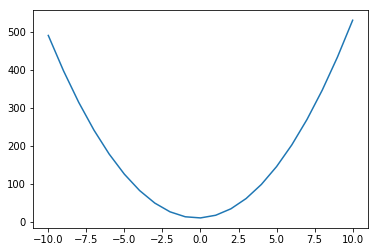

In [374]:
plt.plot(x, y)
plt.show()

Generating Polynomial Features

In [386]:
x_norm = standardization(x)
y_norm = (10 + 2*x_norm + 5*x_norm**2).reshape(-1,1)
print(x_norm)
print(y_norm)

[[-1.6514456477]
 [-1.4863010829]
 [-1.3211565182]
 [-1.1560119534]
 [-0.9908673886]
 [-0.8257228238]
 [-0.6605782591]
 [-0.4954336943]
 [-0.3302891295]
 [-0.1651445648]
 [ 0.          ]
 [ 0.1651445648]
 [ 0.3302891295]
 [ 0.4954336943]
 [ 0.6605782591]
 [ 0.8257228238]
 [ 0.9908673886]
 [ 1.1560119534]
 [ 1.3211565182]
 [ 1.4863010829]
 [ 1.6514456477]]
[[20.333472341 ]
 [18.0728523796]
 [16.084959691 ]
 [14.3697942751]
 [12.9273561319]
 [11.7576452614]
 [10.8606616637]
 [10.2364053387]
 [ 9.8848762864]
 [ 9.8060745068]
 [10.          ]
 [10.4666527659]
 [11.2060328045]
 [12.2181401159]
 [13.5029747   ]
 [15.0605365568]
 [16.8908256863]
 [18.9938420886]
 [21.3695857636]
 [24.0180567113]
 [26.9392549317]]


In [387]:
degree = 2
x_poly = polynomial_features_generation(x_norm,degree)

In [388]:
start_time = time.time()
i,cal_weights, grads, costs = gradient_descent(x=x_poly, y=y_norm,alpha=1e-5,tolerance_cost=1e-7,
                                               tolerance_gradient=1e-7, max_iter=1e7)
end_time = time.time()

[Cost Tolerance - Precision] Satisfied


In [389]:
print('Time taken: ',end_time-start_time)
print('Iterations: ',i)
print('Calculated weights:\n',cal_weights)

Time taken:  4.700448989868164
Iterations:  91091
Calculated weights:
 [[9.991328727 ]
 [1.9999999927]
 [5.0058856294]]


Orignal weights were: 10    2    5

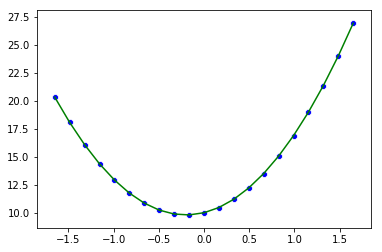

In [390]:
result = (cal_weights[0] + cal_weights[1]*x_norm + cal_weights[2]*x_norm**2).reshape(-1,1)

sns.lineplot(x=x_norm[:,0],y=y_norm[:,0],color='g')
sns.scatterplot(x=x_norm[:,0],y=result[:,0],color='b')

###### Running on real dataset

In [320]:
house_data = pd.read_csv('Related Datasets/kc_house_data.csv')
house_test_data = pd.read_csv('Related Datasets/kc_house_test_data.csv')
house_train_data = pd.read_csv('Related Datasets/kc_house_train_data.csv')

In [394]:
data = np.array(house_train_data['sqft_living']).reshape(-1,1)
target = np.array(house_train_data['price']).reshape(-1,1)

standardizing data

In [395]:
data = min_max_scaling(data)
print(data.shape)
print(target.shape)

(17384, 1)
(17384, 1)


In [393]:
max = np.max(data)
index_max = np.argmax(data)
data = np.delete(data,index_max).reshape(-1,1)
target_not_shaped = np.delete(target,index_max)
target = target_not_shaped.reshape(-1,1)

In [324]:
print(data.shape)
print(target.shape)
print(target_not_shaped.shape)

(17383, 1)
(17383, 1)
(17383,)


Generating polynomail features

In [325]:
data_poly = polynomial_features_generation(data,4)
data_poly.shape

(17383, 4)

with small lambda

In [326]:
start_time = time.time()
i,weights_l2_0, grads, costs = gradient_descent(x=data, y=target,alpha=1e-12,tolerance_cost=1e-7,
                                               tolerance_gradient=1e-7, max_iter=10000,l2_regularization=0)
end_time = time.time()

Iterations Completed


In [327]:
print('Time taken: ',end_time-start_time)
print('Iterations: ',i)
np.set_printoptions(precision=10)
print('Calculated weights:\n',weights_l2_0)

Time taken:  1.40938401222229
Iterations:  10000
Calculated weights:
 [[93.8991471426]
 [45.8077908928]]


With big lambda

In [328]:
start_time = time.time()
i,weights_l2_1e11, grads, costs = gradient_descent(x=data, y=target,alpha=1e-12,tolerance_cost=1e-7,
                                               tolerance_gradient=1e-7, max_iter=10000,l2_regularization=1e11)
end_time = time.time()

Iterations Completed


In [329]:
print('Time taken: ',end_time-start_time)
print('Iterations: ',i)
np.set_printoptions(precision=10)
print('Calculated weights:\n',weights_l2_1e11)

Time taken:  1.4404230117797852
Iterations:  10000
Calculated weights:
 [[9.4081078988e+01]
 [2.2444800404e-02]]


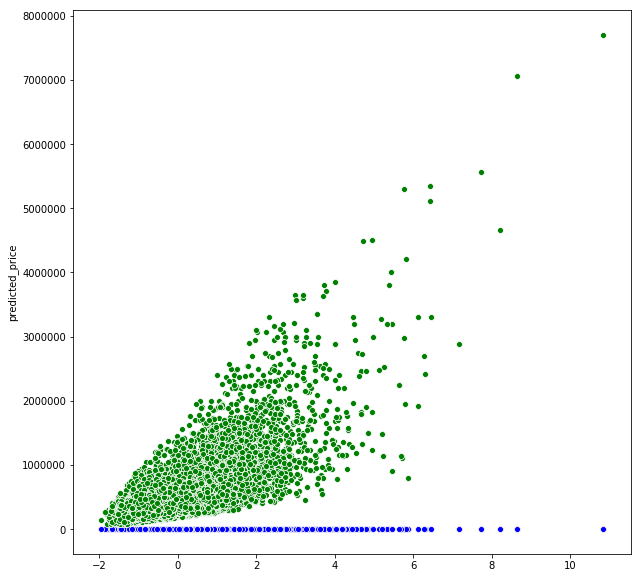

In [330]:
plt.figure(figsize=(10,10))

result_l2_0 = weights_l2_0[0] + weights_l2_0[1]*data[:,0]
temp_df_small_l2 = pd.DataFrame(data,columns=['sqft'])
temp_df_small_l2['predicted_price'] = result_l2_0
sns.scatterplot(data=temp_df_small_l2,x=data[:,0],y='predicted_price',color='r')

result_l2_1e11 = weights_l2_1e11[0] + weights_l2_1e11[1]*data[:,0]
temp_df_big_l2 = pd.DataFrame(data,columns=['sqft'])
temp_df_big_l2['predicted_price'] = result_l2_1e11
sns.scatterplot(data=temp_df_big_l2,x=data[:,0],y='predicted_price',color='b')

sns.scatterplot(x=data[:,0],y=target_not_shaped,color='g')

In [331]:
print('For 0 l2:   ',root_mean_squared_error(result_l2_0,target,target.shape[0]))
print('For 1e12 l2:',root_mean_squared_error(result_l2_1e11,target,target.shape[0]))

For 0 l2:    86174786.46180694
For 1e12 l2: 86174762.90283266


In [332]:
df = pd.DataFrame({'y_true': target[:,0], 'y_pred_no_reg': result_l2_0, 'y_pred_reg': result_l2_1e11})
df.head()

,y_true,y_pred_no_reg,y_pred_reg
0,221900.0,49.163722,94.059160
1,538000.0,118.252835,94.093012
2,180000.0,28.784919,94.049174
3,604000.0,87.933153,94.078156
4,510000.0,74.015921,94.071337


/home/nauman/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


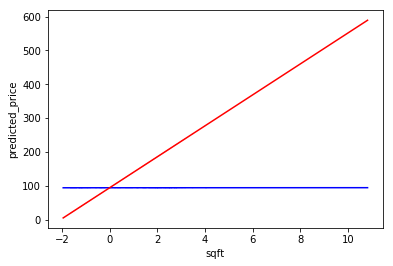

In [333]:
sns.lineplot(x=temp_df_big_l2['sqft'],y=temp_df_big_l2['predicted_price'],color='b')
sns.lineplot(x=temp_df_small_l2['sqft'],y=temp_df_small_l2['predicted_price'],color='r')

With polynomial features

Small lambda

In [334]:
start_time = time.time()
i,weights_l2_0, grads, costs = gradient_descent(x=data_poly, y=target,alpha=1e-12,tolerance_cost=1e-7,
                                               tolerance_gradient=1e-7, max_iter=10000,l2_regularization=0)
end_time = time.time()

Iterations Completed


In [335]:
print('Time taken: ',end_time-start_time)
print('Iterations: ',i)
np.set_printoptions(precision=10)
print('Calculated weights:\n',weights_l2_0)

Time taken:  1.4229323863983154
Iterations:  10000
Calculated weights:
 [[  92.9749595205]
 [  39.693544375 ]
 [ 150.7661367723]
 [ 346.6097260537]
 [1151.8851133261]]


With big lambda

In [336]:
start_time = time.time()
i,weights_l2_1e11, grads, costs = gradient_descent(x=data_poly, y=target,alpha=1e-12,tolerance_cost=1e-7,
                                               tolerance_gradient=1e-7, max_iter=10000,l2_regularization=1e11)
end_time = time.time()

Iterations Completed


In [337]:
print('Time taken: ',end_time-start_time)
print('Iterations: ',i)
print('Calculated weights:\n',weights_l2_1e11)

Time taken:  1.7050368785858154
Iterations:  10000
Calculated weights:
 [[9.3890344154e+01]
 [2.2438620980e-02]
 [9.4232991969e-02]
 [3.2176690579e-01]
 [1.8810667037e+00]]


/home/nauman/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


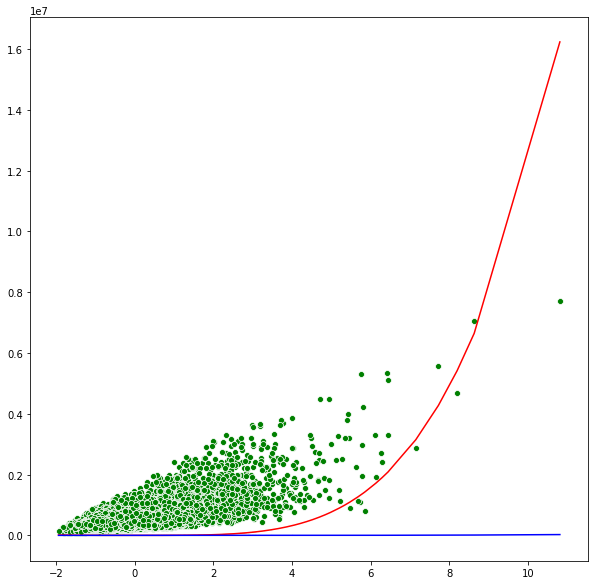

In [338]:
plt.figure(figsize=(10,10))

result_l2_0 = weights_l2_0[0] + weights_l2_0[1]*data_poly[:,0] + weights_l2_0[2]*data_poly[:,1] + weights_l2_0[3]*data_poly[:,2]+ weights_l2_0[4]*data_poly[:,3]
# temp_df_small_l2 = pd.DataFrame(data_poly,columns=[['sqft_1','sqft_2','sqft_3','sqft_4']])
# temp_df_small_l2['predicted_price'] = result_l2_0
sns.lineplot( x=data_poly[:,0], y=result_l2_0,color='r')

result_l2_1e11 = weights_l2_1e11[0] + weights_l2_1e11[1]*data_poly[:,0]  + weights_l2_1e11[2]*data_poly[:,1]  + weights_l2_1e11[3]*data_poly[:,2]  + weights_l2_1e11[4]*data_poly[:,3]
# temp_df_big_l2 = pd.DataFrame(data_poly,columns=[['sqft_1','sqft_2','sqft_3','sqft_4']])
# temp_df_big_l2['predicted_price'] = result_l2_1e11
sns.lineplot(x=data_poly[:,0],y=result_l2_1e11,color='b')

sns.scatterplot(x=data_poly[:,0],y=target_not_shaped,color='g')